In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm

In [2]:
data=pd.read_excel('Revenus.xlsx',engine='openpyxl')

In [3]:
data['NTLBIN'] = data['N TL'].apply(lambda x:0 if x==0 else 1)
data=data.drop('N TL',axis=1)
data = data.select_dtypes(exclude=['object'])

In [16]:
data.head()

,SNHM21,SNHMC21,SNHMP21,SNHME21,SNHMO21,SNHMF21,SNHMFC21,SNHMFP21,SNHMFE21,SNHMFO21,...,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16,NTLBIN
0,17.674133,27.487157,15.418987,11.558981,11.151372,15.618931,23.406198,14.549058,11.399366,10.149316,...,11.8,5.8,1.4,2.5,2.0,-21.0,10080.857143,44958.800000,4.459819,1
1,13.738577,23.774610,14.241684,10.809604,10.669007,12.829422,20.802920,13.742414,10.802136,9.626269,...,8.6,9.4,2.4,3.7,3.3,-17.0,9110.000000,35354.000000,3.880790,1
2,14.105886,24.151227,15.115002,11.287623,11.383895,13.153028,21.557681,14.287858,11.172867,10.071489,...,9.9,7.6,1.7,3.4,2.5,-16.8,10747.333333,34446.000000,3.205074,1
3,15.004501,26.103473,14.918867,11.204223,11.256431,13.826908,22.723781,14.167918,11.168978,10.115035,...,11.7,6.9,1.6,2.9,2.3,-17.6,10226.153846,39145.333333,3.827962,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.9,8.7,2.1,3.8,2.8,-16.7,9307.000000,34971.000000,3.757494,1


In [17]:
#numerical_data = data.select_dtypes(exclude=['object'])
correlations = data.corr()['NTLBIN']
#print(correlations)
threshold = -0.3  # Remplacez par le seuil de votre choix

# Filtrer les corrélations supérieures au seuil
filtered_correlations = correlations[correlations.abs() > threshold]

# Afficher les corrélations filtrées
print("\nCorrélations supérieures à", threshold, ":")
print(filtered_correlations)


Corrélations supérieures à -0.3 :
SNHM21     -0.060677
SNHMC21    -0.015229
SNHMP21    -0.133477
SNHME21    -0.132320
SNHMO21    -0.165768
              ...   
PIMPOT16    0.020440
D116       -0.290083
D916       -0.036601
RD16        0.281514
NTLBIN      1.000000
Name: NTLBIN, Length: 196, dtype: float64


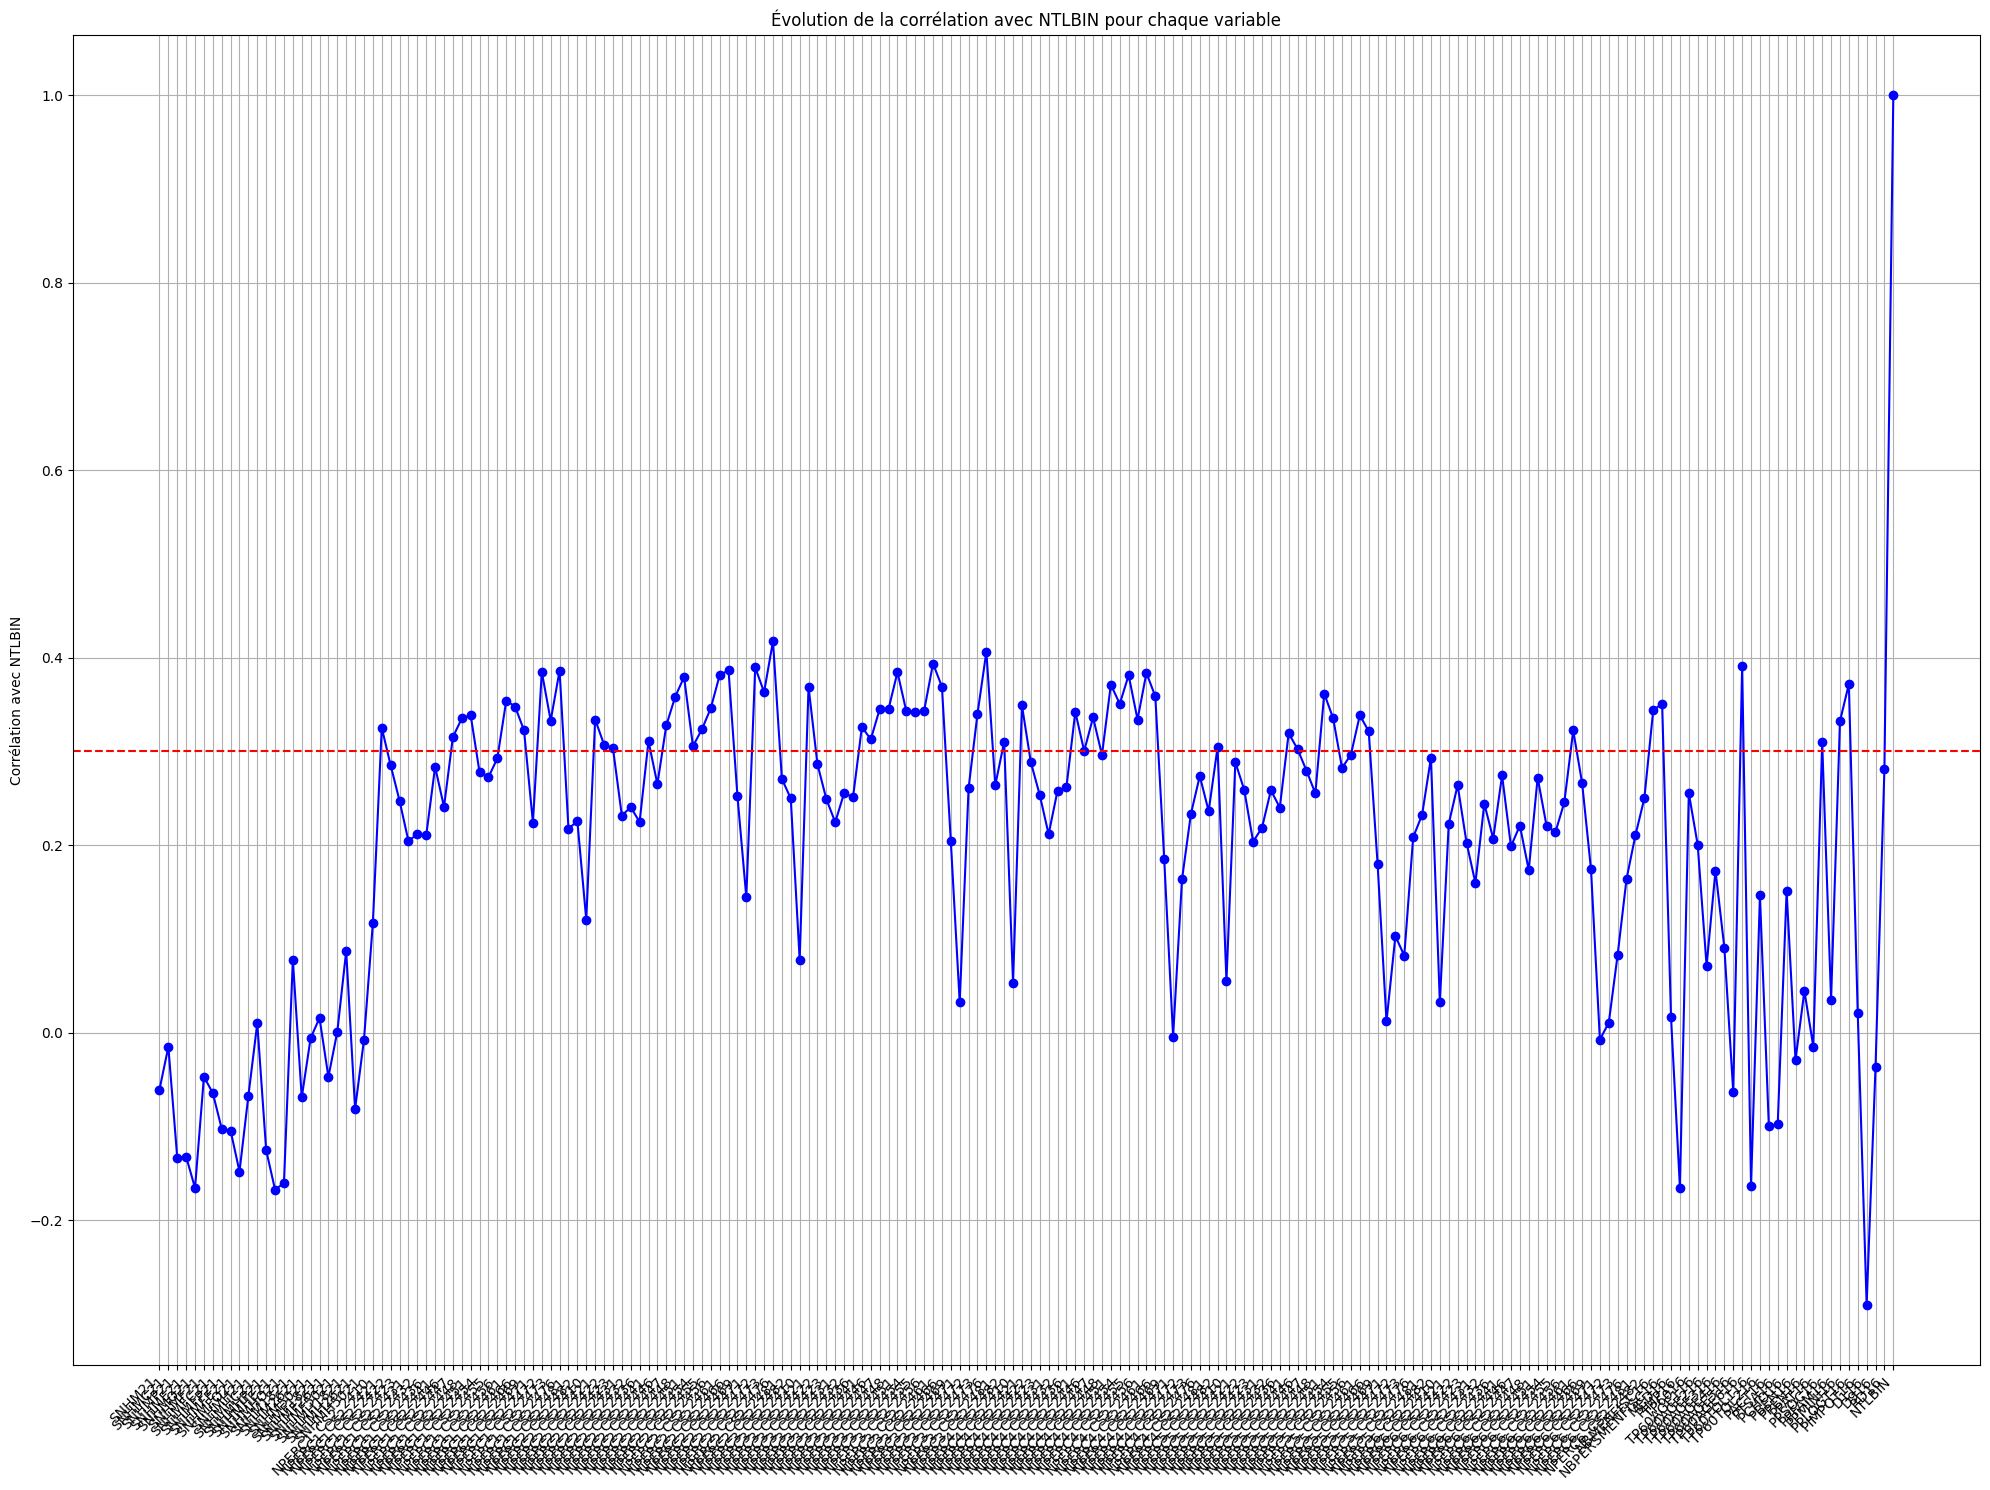

In [19]:
plt.figure(figsize=(20, 15))
plt.plot(correlations.index, correlations.values, color='blue', marker='o')
plt.axhline(y=0.3,color='r',linestyle='--')
plt.ylabel('Corrélation avec NTLBIN')
plt.title('Évolution de la corrélation avec NTLBIN pour chaque variable')
plt.grid(True)
plt.xticks(ticks=correlations.index, labels=correlations.index,ha='right',rotation=45)
plt.tight_layout()
plt.show()


In [4]:
min_values = data.min()

data= data.fillna(min_values)

In [22]:
from sklearn.feature_selection import VarianceThreshold
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

# Définition de la fonction pour calculer le VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initialisation de X avec vos données (en supprimant la variable cible)
X = data.drop(columns=['NTLBIN'])

# Calcul des VIF initiaux
vif_data = calculate_vif(X)
print("VIF initiaux:")
print(vif_data)

# Seuil initial pour le VIF élevé
high_vif_threshold = 10

# Si le nombre de variables restantes est <= 100, supprimer une par une

while vif_data['VIF'].max() > high_vif_threshold:
    max_vif_variable = vif_data.sort_values('VIF', ascending=False)['Variable'].iloc[0]
    print(f'Suppression de la variable avec le VIF le plus élevé: {max_vif_variable}')
    X = X.drop(columns=[max_vif_variable])
    vif_data = calculate_vif(X)
    print(vif_data)

print('Variables restantes après suppression des variables à forte multicolinéarité:')
print(X.columns)


VIF initiaux:
     Variable           VIF
0      SNHM21  3.419445e+06
1     SNHMC21  1.237332e+05
2     SNHMP21  3.479200e+05
3     SNHME21  8.434630e+05
4     SNHMO21  3.664395e+05
..        ...           ...
190  PPLOGT16  1.138290e+03
191  PIMPOT16  2.870707e+04
192      D116  4.712194e+04
193      D916  6.257691e+04
194      RD16  6.236166e+04

[195 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: SNHM21
     Variable            VIF
0     SNHMC21  122699.200633
1     SNHMP21  347832.590631
2     SNHME21  661665.009556
3     SNHMO21  361650.329563
4     SNHMF21  311357.582344
..        ...            ...
189  PPLOGT16    1138.235332
190  PIMPOT16   28189.986671
191      D116   46950.510632
192      D916   62399.398917
193      RD16   62018.694873

[194 rows x 2 columns]
Suppression de la variable avec le VIF le plus élevé: PACT16
     Variable            VIF
0     SNHMC21  122014.338930
1     SNHMP21  347513.965563
2     SNHME21  608891.761258
3     SNHMO21  3

In [23]:
#Z=X.columns
print(Z)

Index(['NPERC1_CS2_2410', 'NPERC1_CS2_2423', 'NPERC1_CS2_2469',
       'NPERC1_CS2_2471', 'NPERC2_CS2_2410', 'NPERC2_CS2_2421',
       'NPERC2_CS2_2423', 'NPERC2_CS2_2448', 'NPERC2_CS2_2469',
       'NPERC2_CS2_2471', 'NPERC2_CS2_2472', 'NPERC3_CS2_2410',
       'NPERC3_CS2_2421', 'NPERC3_CS2_2423', 'NPERC3_CS2_2447',
       'NPERC3_CS2_2448', 'NPERC3_CS2_2469', 'NPERC3_CS2_2471',
       'NPERC3_CS2_2472', 'NPERC3_CS2_2473', 'NPERC3_CS2_2476',
       'NPERC3_CS2_2481', 'NPERC4_CS2_2410', 'NPERC4_CS2_2421',
       'NPERC4_CS2_2422', 'NPERC4_CS2_2423', 'NPERC4_CS2_2447',
       'NPERC4_CS2_2448', 'NPERC4_CS2_2454', 'NPERC4_CS2_2455',
       'NPERC4_CS2_2456', 'NPERC4_CS2_2466', 'NPERC4_CS2_2469',
       'NPERC4_CS2_2471', 'NPERC4_CS2_2472', 'NPERC4_CS2_2473',
       'NPERC4_CS2_2476', 'NPERC4_CS2_2481', 'NPERC5_CS2_2410',
       'NPERC5_CS2_2421', 'NPERC5_CS2_2422', 'NPERC5_CS2_2423',
       'NPERC5_CS2_2441', 'NPERC5_CS2_2446', 'NPERC5_CS2_2447',
       'NPERC5_CS2_2448', 'NPERC5_CS2_24

In [5]:
colonnes=['NPERC1_CS2_2410', 'NPERC1_CS2_2423', 'NPERC1_CS2_2469',
       'NPERC1_CS2_2471', 'NPERC2_CS2_2410', 'NPERC2_CS2_2421',
       'NPERC2_CS2_2423', 'NPERC2_CS2_2448', 'NPERC2_CS2_2469',
       'NPERC2_CS2_2471', 'NPERC2_CS2_2472', 'NPERC3_CS2_2410',
       'NPERC3_CS2_2421', 'NPERC3_CS2_2423', 'NPERC3_CS2_2447',
       'NPERC3_CS2_2448', 'NPERC3_CS2_2469', 'NPERC3_CS2_2471',
       'NPERC3_CS2_2472', 'NPERC3_CS2_2473', 'NPERC3_CS2_2476',
       'NPERC3_CS2_2481', 'NPERC4_CS2_2410', 'NPERC4_CS2_2421',
       'NPERC4_CS2_2422', 'NPERC4_CS2_2423', 'NPERC4_CS2_2447',
       'NPERC4_CS2_2448', 'NPERC4_CS2_2454', 'NPERC4_CS2_2455',
       'NPERC4_CS2_2456', 'NPERC4_CS2_2466', 'NPERC4_CS2_2469',
       'NPERC4_CS2_2471', 'NPERC4_CS2_2472', 'NPERC4_CS2_2473',
       'NPERC4_CS2_2476', 'NPERC4_CS2_2481', 'NPERC5_CS2_2410',
       'NPERC5_CS2_2421', 'NPERC5_CS2_2422', 'NPERC5_CS2_2423',
       'NPERC5_CS2_2441', 'NPERC5_CS2_2446', 'NPERC5_CS2_2447',
       'NPERC5_CS2_2448', 'NPERC5_CS2_2451', 'NPERC5_CS2_2454',
       'NPERC5_CS2_2455', 'NPERC5_CS2_2456', 'NPERC5_CS2_2461',
       'NPERC5_CS2_2466', 'NPERC5_CS2_2469', 'NPERC5_CS2_2471',
       'NPERC5_CS2_2472', 'NPERC5_CS2_2473', 'NPERC5_CS2_2476',
       'NPERC5_CS2_2481', 'NPERC5_CS2_2482', 'NPERC6_CS2_2410',
       'NPERC6_CS2_2421', 'NPERC6_CS2_2422', 'NPERC6_CS2_2423',
       'NPERC6_CS2_2431', 'NPERC6_CS2_2432', 'NPERC6_CS2_2436',
       'NPERC6_CS2_2441', 'NPERC6_CS2_2446', 'NPERC6_CS2_2447',
       'NPERC6_CS2_2448', 'NPERC6_CS2_2451', 'NPERC6_CS2_2454',
       'NPERC6_CS2_2455', 'NPERC6_CS2_2456', 'NPERC6_CS2_2461',
       'NPERC6_CS2_2466', 'NPERC6_CS2_2469', 'NPERC6_CS2_2471',
       'NPERC6_CS2_2472', 'NPERC6_CS2_2473', 'NPERC6_CS2_2476',
       'NPERC6_CS2_2481', 'NPERC6_CS2_2482', 'MED16', 'PBEN16', 'PPMINI16']


X=data[colonnes]

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())



         Current function value: 0.125784
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4313
Model:                          Logit   Df Residuals:                     4227
Method:                           MLE   Df Model:                           85
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.3273
Time:                        16:14:37   Log-Likelihood:                -542.50
converged:                      False   LL-Null:                       -806.48
Covariance Type:            nonrobust   LLR p-value:                 3.906e-65
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
NPERC1_CS2_2410     0.0101      0.024      0.416      0.677      -0.038       0.058
NPERC1_CS2_2423    -0.0206      0.043     -0.476  

c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
for i in range (len(result.pvalues.index)) : 
    if result.pvalues[i] >=0.05 :
        colonnes.remove(result.pvalues.index[i])

        
X=data[colonnes]

y = data['NTLBIN']

# Séparer les données en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
log_reg = sm.Logit(y, X)
result = log_reg.fit()

# Afficher le résumé du modèle
print(result.summary())

"""NPERC2_CS2_2448     0.0347      0.014      2.396      0.017       0.006       0.063
NPERC3_CS2_2421     0.0664      0.012      5.440      0.000       0.042       0.090
NPERC4_CS2_2410    -0.0352      0.022     -1.571      0.116      -0.079       0.009
NPERC4_CS2_2455     0.0584      0.017      3.407      0.001       0.025       0.092
NPERC4_CS2_2476    -0.0836      0.033     -2.503      0.012      -0.149      -0.018
NPERC5_CS2_2421    -0.0799      0.023     -3.504      0.000      -0.125      -0.035
NPERC5_CS2_2422    
NPERC5_CS2_2454     0.1033      0.032      3.237      0.001       0.041       0.166
NPERC5_CS2_2473    -0.3094      0.163     -1.894      0.058      -0.630       0.011
NPERC6_CS2_2421    -0.1174      0.049     -2.407      0.016      -0.213      -0.022
NPERC6_CS2_2432     0.0956      0.055      1.726      0.084      -0.013       0.204
NPERC6_CS2_2455    
NPERC6_CS2_2473   
MED16             
PPMINI16 """

Optimization terminated successfully.
         Current function value: 0.133993
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 NTLBIN   No. Observations:                 4313
Model:                          Logit   Df Residuals:                     4298
Method:                           MLE   Df Model:                           14
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.2834
Time:                        16:16:22   Log-Likelihood:                -577.91
converged:                       True   LL-Null:                       -806.48
Covariance Type:            nonrobust   LLR p-value:                 1.103e-88
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
NPERC2_CS2_2448     0.0347      0.014      2.396      0.017       0.006       0.063
NPERC3_CS2_242

C:\Users\mohci\AppData\Local\Temp\ipykernel_5836\2462360132.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if result.pvalues[i] >=0.05 :


'NPERC2_CS2_2448     0.0347      0.014      2.396      0.017       0.006       0.063\nNPERC3_CS2_2421     0.0664      0.012      5.440      0.000       0.042       0.090\nNPERC4_CS2_2410    -0.0352      0.022     -1.571      0.116      -0.079       0.009\nNPERC4_CS2_2455     0.0584      0.017      3.407      0.001       0.025       0.092\nNPERC4_CS2_2476    -0.0836      0.033     -2.503      0.012      -0.149      -0.018\nNPERC5_CS2_2421    -0.0799      0.023     -3.504      0.000      -0.125      -0.035\nNPERC5_CS2_2422    \nNPERC5_CS2_2454     0.1033      0.032      3.237      0.001       0.041       0.166\nNPERC5_CS2_2473    -0.3094      0.163     -1.894      0.058      -0.630       0.011\nNPERC6_CS2_2421    -0.1174      0.049     -2.407      0.016      -0.213      -0.022\nNPERC6_CS2_2432     0.0956      0.055      1.726      0.084      -0.013       0.204\nNPERC6_CS2_2455    \nNPERC6_CS2_2473   \nMED16             \nPPMINI16 '

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg=LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = log_reg.predict(X_test)

# Afficher les résultatsa
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[812   1]
 [ 38  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       813
           1       0.92      0.24      0.38        50

    accuracy                           0.95       863
   macro avg       0.94      0.62      0.68       863
weighted avg       0.95      0.95      0.94       863


Accuracy Score:
0.9548088064889919


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\mohci\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


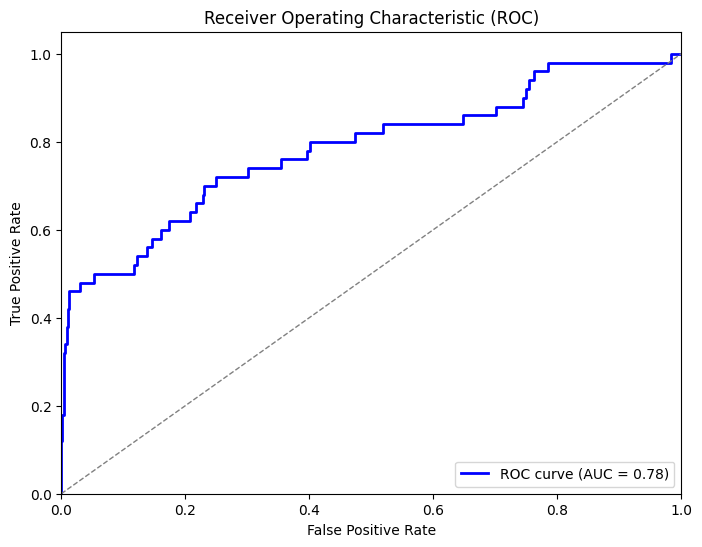

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
model = LogisticRegression()

# Entraînez le modèle sur l'ensemble d'apprentissage
model.fit(X_train, y_train)

# Prédisez les probabilités des classes pour l'ensemble de test
y_probs = model.predict_proba(X_test)[:, 1]

# Calculez la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

auc_roc = roc_auc_score(y_test, y_probs)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_roc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()